Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


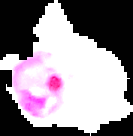

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image 
import PIL 
  

from google.colab import drive
drive.mount('/content/drive')

img = cv2.imread('/content/cell3.png', 1)
# converting to LAB color space
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image

contrast = 2. # Contrast control ( 0 to 127)
brightness = 1. # Brightness control (0-100)

# call addWeighted function. use beta = 0 to effectively only

result = np.hstack((img, enhanced_img))
result = cv2.addWeighted(img, contrast, img, 0, brightness)
cv2_imshow(result)

cv2.imwrite('"/content/drive/MyDrive/project_folder/contrast_cell.png"', result)

cv2.waitKey()
im = Image.fromarray(result)
im.save("/content/drive/MyDrive/project_folder/contrast_cell.jpeg")

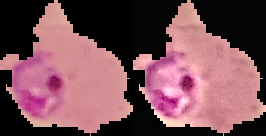

In [ ]:
img = cv2.imread('/content/cell3.png', 1)
# converting to LAB color space
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
result = np.hstack((img, enhanced_img))
cv2_imshow(result)

cv2.waitKey()
im = Image.fromarray(result)
im.save("/content/drive/MyDrive/project_folder/contrast_cell3.jpeg")

In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import torch
import clip
import random



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-gjrf6mw_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-gjrf6mw_
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done


In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content/weights


In [ ]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content/weights
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-fv2ql2zr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-fv2ql2zr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q jupyter_bbox_widget dataclasses-json supervision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content/weights
/content/weights/weights


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
model, preprocess = clip.load("ViT-B/32", device=DEVICE)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 53.8MiB/s]


In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
import os

IMAGE_NAME = "cell.png" #if you dont have this image, search up an image of something, upload to your drive, then copy path here
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread("/content/cell.png")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb) 

In [ ]:
print(sam_result[0].keys()) #--> SAM different outputs --> BBOX is what we need for the crop

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


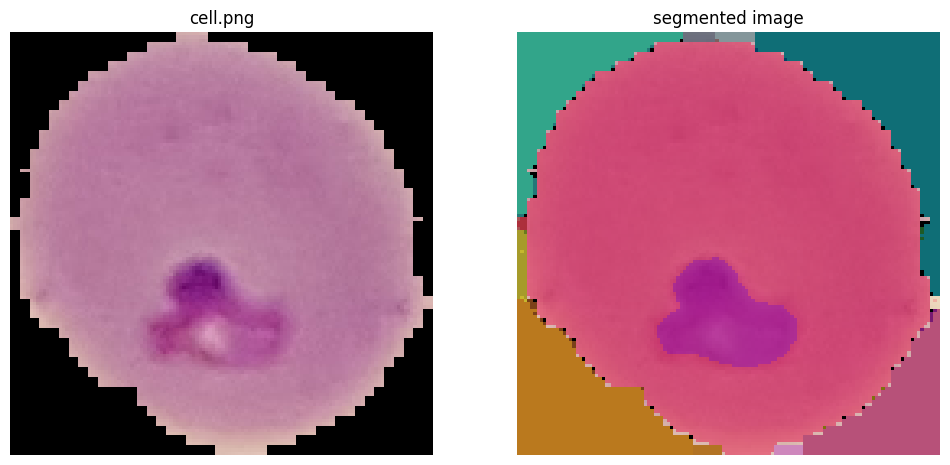

In [ ]:
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['cell.png', 'segmented image']
)

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


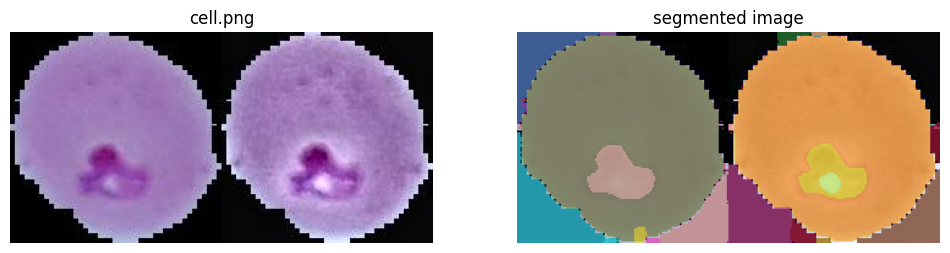

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread("/content/contrast_cell.jpeg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb) 

print(sam_result[0].keys()) #--> SAM different outputs --> BBOX is what we need for the crop

mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['cell.png', 'segmented image']
)

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


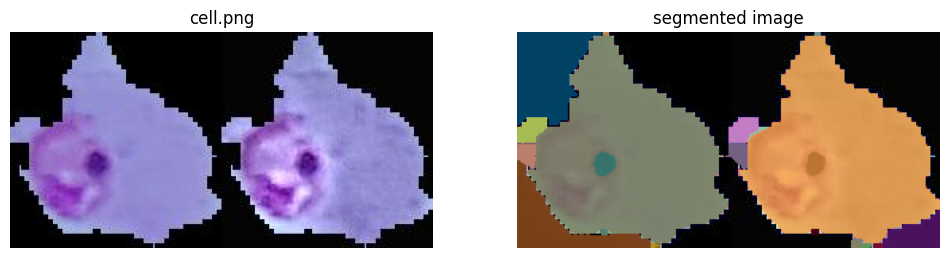

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread("/content/drive/MyDrive/project_folder/contrast_cell3.jpeg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb) 

print(sam_result[0].keys()) #--> SAM different outputs --> BBOX is what we need for the crop

mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['cell.png', 'segmented image']
)

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


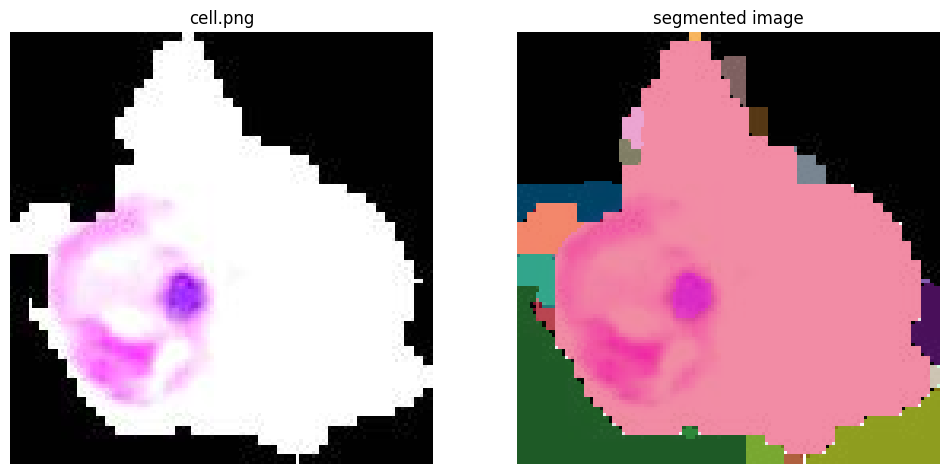

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread("/content/drive/MyDrive/project_folder/contrast_cell.jpeg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb) 

print(sam_result[0].keys()) #--> SAM different outputs --> BBOX is what we need for the crop

mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['cell.png', 'segmented image']
)

In [ ]:
def crop_image(image, mask):
    x, y, w, h = mask["bbox"]
    masked = image * np.expand_dims(mask["segmentation"], -1)
    crop = masked[y : y + h, x : x + w]
    if h > w:
        top, bottom, left, right = 0, 0, (h - w) // 2, (h - w) // 2
    else:
        top, bottom, left, right = (w - h) // 2, (w - h) // 2, 0, 0
    # padding
    crop = cv2.copyMakeBorder(
        crop,
        top,
        bottom,
        left,
        right,
        cv2.BORDER_CONSTANT,
        value=(0, 0, 0),
    )

    crop = PIL.Image.fromarray(crop)
    return crop

In [ ]:
def score(text, cropimage):
  image = preprocess(cropimage).unsqueeze(0).to(DEVICE)
  text = clip.tokenize([text, "background"]).to(DEVICE)

  with torch.no_grad():
      image_features = model.encode_image(image)
      text_features = model.encode_text(text)
      
      logits_per_image, logits_per_text = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

  return probs[0,0]

In [ ]:
def draw_masks(image, masks, alpha = 0.7):
    for mask in masks:
        color = [random.randint(127, 255) for _ in range(3)]

        # draw mask overlay
        colored_mask = np.expand_dims(mask["segmentation"], 0).repeat(3, axis=0)
        colored_mask = np.moveaxis(colored_mask, 0, -1)
        masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
        image_overlay = masked.filled()
        image = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)

        # draw contour
        contours, _ = cv2.findContours(
            np.uint8(mask["segmentation"]), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        cv2.drawContours(image, contours, -1, (0, 0, 255), 1)
    return PIL.Image.fromarray(image)

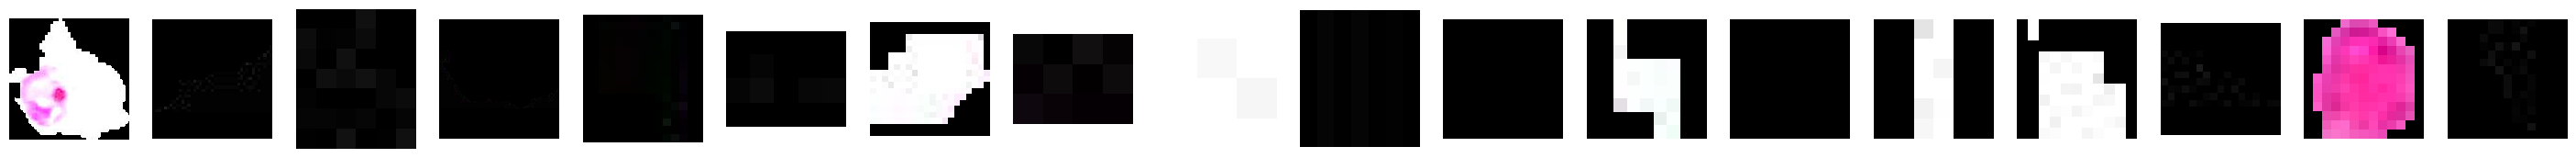

In [ ]:
seg_array = [[crop_image(image_bgr, i), i] for i in sam_result]

num_images = len(seg_array)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))

# Loop through each image and display it on its corresponding subplot
for i in range(num_images):
    axes[i].imshow(seg_array[i][0]) #get cropped images
    axes[i].axis('off')

# Show the figure
plt.show()
